# 데이터 분석

1. `TOTAL` 라벨의 텍스트 내 위치

    - `total`이라는 word가 존재하는 샘플의 개수
        - 그렇지 않은 샘플의 특징
    - `total`이라는 word가 항상 `TOTAL` 라벨보다 앞에 나오는가?
        - 결과

    - Inference단계에서 후처리

    - 결과 분석

## `TOTAL` 라벨의 텍스트 내 위치

### `total`이라는 word가 존재하는 샘플의 개수

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

total_train_df = pd.read_csv('train_df.csv')
total_train_df

,text,labels,boxes,actual_boxes,file_name,page_size
0,"['TAN', 'WOON', 'YANN', 'BOOK', 'TA', '.K(TAMA...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[[155, 24, 280, 63], [291, 24, 460, 63], [470,...","[[72, 25, 130, 64], [135, 25, 213, 64], [218, ...",X00016469612,"[463, 1013]"
1,"['TAN', 'WOON', 'YANN', 'INDAH', 'GIFT', '&', ...","['O', 'O', 'O', 'S-COMPANY', 'S-COMPANY', 'S-C...","[[173, 49, 302, 83], [314, 49, 487, 83], [498,...","[[76, 50, 133, 84], [138, 50, 214, 84], [219, ...",X00016469619,"[439, 1004]"
2,"['TAN', 'WOON', 'YANN', 'MR', 'D.T.Y.', '(JOHO...","['O', 'O', 'O', 'S-COMPANY', 'S-COMPANY', 'S-C...","[[259, 49, 383, 84], [394, 49, 559, 84], [570,...","[[119, 47, 176, 80], [181, 47, 257, 80], [262,...",X00016469620,"[459, 949]"
3,"['TAN', 'WOON', 'YANN', 'YONGFATT', 'ENTERPRIS...","['O', 'O', 'O', 'S-COMPANY', 'S-COMPANY', 'O',...","[[208, 43, 336, 84], [347, 43, 518, 84], [529,...","[[96, 41, 155, 79], [160, 41, 239, 79], [244, ...",X00016469622,"[461, 933]"
4,"['TAN', 'WOON', 'YANN', 'MR', 'D.I.Y.', '(M)',...","['O', 'O', 'O', 'S-COMPANY', 'S-COMPANY', 'S-C...","[[179, 39, 302, 76], [313, 39, 477, 76], [488,...","[[83, 41, 140, 78], [145, 41, 221, 78], [226, ...",X00016469623,"[463, 1026]"
...,...,...,...,...,...,...
621,"['ONE', 'ONE', 'THREE', 'SEAFOOD', 'RESTAURANT...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'S-COM...","[[108, 192, 164, 215], [171, 192, 227, 215], [...","[[86, 329, 131, 368], [136, 329, 181, 368], [1...",X51008164997,"[795, 1705]"
622,"['ONE', 'ONE', 'THREE', 'SEAFOOD', 'RESTAURANT...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'S-COM...","[[109, 208, 166, 230], [172, 208, 229, 230], [...","[[87, 341, 132, 377], [137, 341, 182, 377], [1...",X51008164998,"[793, 1636]"
623,"['ONE', 'ONE', 'THREE', 'SEAFOOD', 'RESTAURANT...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'S-COM...","[[107, 172, 164, 187], [170, 172, 227, 187], [...","[[85, 334, 130, 363], [135, 334, 180, 363], [1...",X51008164999,"[791, 1932]"
624,"['3180303', 'GL', 'HANDICRAFT', '&', 'TAIL', '...","['O', 'S-COMPANY', 'S-COMPANY', 'S-COMPANY', '...","[[27, 30, 224, 47], [178, 149, 226, 168], [234...","[[16, 40, 131, 62], [104, 195, 132, 219], [137...",X51009453801,"[583, 1303]"


In [12]:
# `total` 이라는 텍스트가 total train 데이터셋(train+dev)의 모든 샘플 내에 포함되어 있는지 확인
total_train_df['text'].str.lower().str.contains('total').value_counts()

text
True     621
False      5
Name: count, dtype: int64

- 626개의 (`train+dev`)샘플 중에서, 5개를 제외하고는 `total이라는 텍스트`가 존재합니다
- 그렇지 않은 샘플의 5개의 특징을 확인해봅니다

In [21]:
total_train_df[(~total_train_df['text'].str.lower().str.contains('total'))]

,text,labels,boxes,actual_boxes,file_name,page_size
47,"['RESTAURANT', 'SIN', 'DU', 'K3-113,JL', 'IBRA...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'S-ADD...","[[331, 253, 403, 267], [408, 253, 429, 267], [...","[[358, 387, 436, 408], [441, 387, 464, 408], [...",X51005442341,"[1080, 1527]"
67,"['LIAN', 'CHI', 'PU', 'TIAN', 'VEGETARIAN', 'R...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'S-COM...","[[167, 91, 267, 111], [272, 91, 347, 111], [35...","[[156, 181, 249, 222], [254, 181, 324, 222], [...",X51005447848,"[932, 1987]"
326,"['TAX', 'INVOICE', 'KHIAM', 'AIK', 'CHAN', 'SD...","['O', 'O', 'S-COMPANY', 'S-COMPANY', 'S-COMPAN...","[[90, 146, 188, 176], [197, 146, 430, 176], [9...","[[53, 183, 111, 220], [116, 183, 253, 220], [5...",X51006555125,"[588, 1248]"
543,"['PASIR', 'EMAS', 'HARDWARE', 'SDN', 'BHD', '(...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'S-COM...","[[309, 250, 362, 262], [363, 250, 405, 262], [...","[[1537, 1757, 1797, 1839], [1802, 1757, 2010, ...",X51007846451,"[4961, 7016]"
611,"['AMTECH', 'ELECTRICAL', 'SUPPLIES', '(0019634...","['S-COMPANY', 'S-COMPANY', 'S-COMPANY', 'O', '...","[[86, 117, 253, 141], [261, 117, 540, 141], [5...","[[53, 120, 156, 144], [161, 120, 333, 144], [3...",X51008145504,"[616, 1020]"


In [40]:
# X51005442341
i = 47
for text, label in zip(eval(total_train_df.iloc[i]['text']), eval(total_train_df.iloc[i]['labels'])):
    print(f"{text:<20} {label:<20}")

RESTAURANT           S-COMPANY           
SIN                  S-COMPANY           
DU                   S-COMPANY           
K3-113,JL            S-ADDRESS           
IBRAHIM              S-ADDRESS           
SULTAN               S-ADDRESS           
80300                S-ADDRESS           
JOHOR                S-ADDRESS           
BAHRU                S-ADDRESS           
JOHOR                S-ADDRESS           
H/P:                 O                   
019-7521215          O                   
016-7867868          O                   
09/03/2018           S-DATE              
21:28                O                   
0001                 O                   
000000#7259          O                   
CASHIER01            O                   
DPT.05               O                   
RM                   O                   
149.00               O                   
DPT.04               O                   
RM                   O                   
21.00                O            

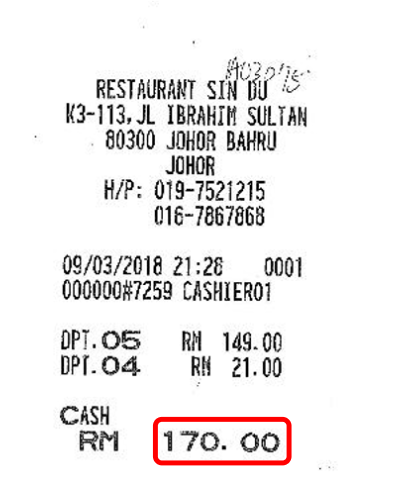

In [37]:
# X51005447848
i = 67
for text, label in zip(eval(total_train_df.iloc[i]['text']), eval(total_train_df.iloc[i]['labels'])):
    print(f"{text:<20} {label:<20}")

LIAN                 S-COMPANY           
CHI                  S-COMPANY           
PU                   S-COMPANY           
TIAN                 S-COMPANY           
VEGETARIAN           S-COMPANY           
RESTAURANT           S-COMPANY           
SDN                  S-COMPANY           
BHD                  S-COMPANY           
(1095514-X)          O                   
(GST                 O                   
ID                   O                   
NO                   O                   
:                    O                   
001147416576)        O                   
54,JALAN             S-ADDRESS           
SS23/11.             S-ADDRESS           
TAMAN                S-ADDRESS           
SEA,47400            S-ADDRESS           
PETALING             S-ADDRESS           
JAYA,SELANGOR        S-ADDRESS           
TEL:                 O                   
03-7805              O                   
7889,                O                   
016-3020             O            

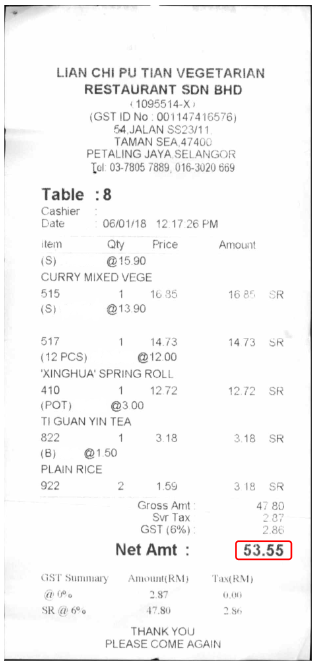

In [38]:
# X51006555125	
i = 326
for text, label in zip(eval(total_train_df.iloc[i]['text']), eval(total_train_df.iloc[i]['labels'])):
    print(f"{text:<20} {label:<20}")

TAX                  O                   
INVOICE              O                   
KHIAM                S-COMPANY           
AIK                  S-COMPANY           
CHAN                 S-COMPANY           
SDN                  S-COMPANY           
BHD                  S-COMPANY           
(88842-H)            O                   
NO.                  S-ADDRESS           
76,                  S-ADDRESS           
JALAN                S-ADDRESS           
SS15/4B,             S-ADDRESS           
47500                S-ADDRESS           
SUBANG               S-ADDRESS           
JAYA,                S-ADDRESS           
SELANGOR             S-ADDRESS           
D.E.                 S-ADDRESS           
GST                  O                   
REG.:                O                   
000555819008         O                   
CASH                 O                   
SALES                O                   
NO.                  O                   
:                    O            

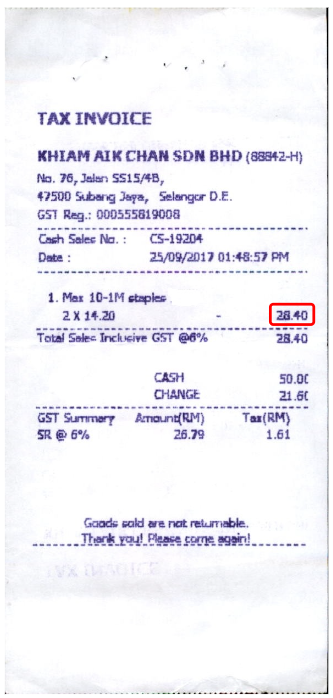

In [39]:
# X51007846451
i = 543
for text, label in zip(eval(total_train_df.iloc[i]['text']), eval(total_train_df.iloc[i]['labels'])):
    print(f"{text:<20} {label:<20}")

PASIR                S-COMPANY           
EMAS                 S-COMPANY           
HARDWARE             S-COMPANY           
SDN                  S-COMPANY           
BHD                  S-COMPANY           
(801222-M)           O                   
(GST                 O                   
ID                   O                   
NO                   O                   
:                    O                   
000144596992)        O                   
NO                   S-ADDRESS           
69,JALAN             S-ADDRESS           
PENGKALAN            S-ADDRESS           
5,                   S-ADDRESS           
TAMAN                S-ADDRESS           
PASIR                S-ADDRESS           
EMAS,                S-ADDRESS           
KG                   S-ADDRESS           
PASIR                S-ADDRESS           
PUTIH,               S-ADDRESS           
81700                S-ADDRESS           
PASIR                S-ADDRESS           
GUDANG,JOHOR.        O            

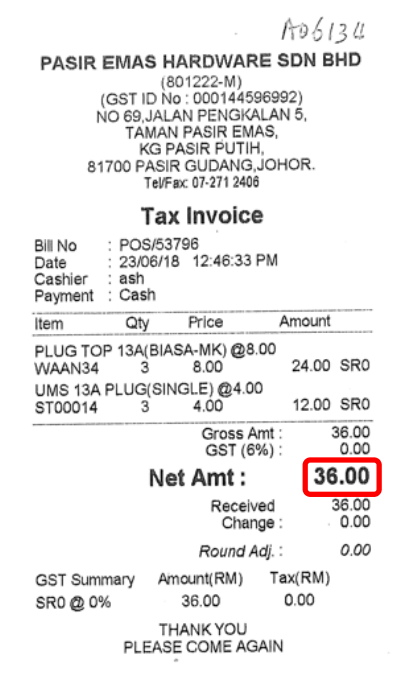

In [41]:
# X51008145504
i = 611
for text, label in zip(eval(total_train_df.iloc[i]['text']), eval(total_train_df.iloc[i]['labels'])):
    print(f"{text:<20} {label:<20}")

AMTECH               S-COMPANY           
ELECTRICAL           S-COMPANY           
SUPPLIES             S-COMPANY           
(001963477-M)        O                   
(GST                 O                   
ID                   O                   
NO                   O                   
001285423104)        O                   
107,                 O                   
JALAN                S-ADDRESS           
BANDAR               S-ADDRESS           
RAWANG               S-ADDRESS           
2,                   S-ADDRESS           
PUSAT                S-ADDRESS           
BANDAR               S-ADDRESS           
RAWANG,              S-ADDRESS           
48000                S-ADDRESS           
RAWANG,              S-ADDRESS           
SELANGOR             O                   
D                    S-ADDRESS           
E                    S-ADDRESS           
EMAIL:               O                   
AMTECH886@YAHOO.COM  O                   
TEL/FAX              O            

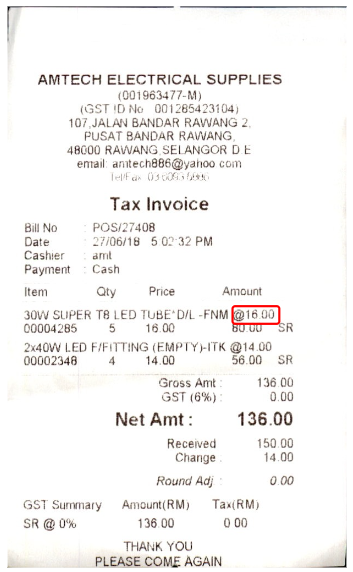

#### 그렇지 않은 샘플의 특징

- 5개의 샘플 중에서 1개의 샘플 (# X51008145504) 은 `TOTAL` 라벨이 잘못 달렸고
- `Net Amt` 라는 단어 뒤에 `TOTAL`인 경우가 (# X51005447848), (# X51008145504), (# X51007846451) 3개 존재합니다
- 그렇다면, 이들의 샘플에 대해서는 `Net Amt` 라는 조건이 앞에 있어야지만 그 다음에 `TOTAL` 이라는 라벨을 달 수 있도록 조건을 추가해볼 수 도 있습니다

### `total`이라는 word가 항상 `TOTAL` 라벨보다 앞에 나오는가?

- Inference 단계에 조건을 추가하기에 앞서 데이터가 실제 위의 조건을 얼마나 만족하는지 통계적으로 확인해보려합니다

- 문장 내 `total`이라는 단어가 여러개 존재할 수 있으므로, 문장 내 존재하는 맨 첫번째 `total`을 기준으로 확인해보겠습니다

In [72]:
# (text내 첫번째 `total`이라는 word의 index 위치) vs ( labels내에 첫번째 `S-TOTAL`의 index 위치)

print('total 텍스트가 존재하는 샘플 개수 : ',621)
cnt= 0 

for idx, row in total_train_df.iterrows():
    text = eval(row['text'].lower())
    labels = eval(row['labels'])

    if 'total' in text:
        total_idx = text.index('total')
        if 'S-TOTAL' in labels:
            s_total_idx = labels.index('S-TOTAL')
            if total_idx < s_total_idx:
                # print(f"idx: {idx}, total_idx: {total_idx}, s_total_idx: {s_total_idx}")
                cnt += 1

print()
print('total_text_index > S-TOTAL_label_index : ',cnt)
print('total_text_index < S-TOTAL_label_index  : ',621-cnt)

total 텍스트가 존재하는 샘플 개수 :  621

total_text_index > S-TOTAL_label_index :  524
total_text_index < S-TOTAL_label_index  :  97


- total이라는 단어가 text 내에 존재한다면, 그 뒤에 `S-TOTAL` 라벨이 오는 경우가 `621`개중에 `546`개입니다.
- 하지만, 그렇지 않은 `97`개도 존재하기 때문에 함부로 조건을 추가하는게 성능 하락으로 이어질 수 있습니다

### output.csv 후처리

In [81]:
import csv

def get_inference_csv(output_dir):
    samples = {'text':[], 'prediction':[], 'file_name':[]}

    # make a list of samples filled with list of predictions
    with open(output_dir) as f:
        reader = csv.reader(f)
        text_sample = []
        prediction_sample = []
        file_name = []

        for row in reader:
            if row == [] or row == "\n":
                samples['text'].append(text_sample)
                samples['prediction'].append(prediction_sample)
                samples['file_name'].append(file_name)
                text_sample = []
                prediction_sample = []
                file_name = []
            else:
                assert len(row) == 3
                text_sample.append(row[0])
                prediction_sample.append(row[1])
                file_name.append(row[2])

    # make a dataframe
    inference_df = pd.DataFrame(samples)

    return inference_df

In [88]:
inference_df = get_inference_csv('../output/output.csv')

In [89]:
inference_df

,text,prediction,file_name
0,"[tan, chay, yee, ***, COPY, **, *, OJC, MARKET...","[O, O, O, O, O, O, O, S-COMPANY, S-COMPANY, S-...","[X00016469670, X00016469670, X00016469670, X00..."
1,"[tan, chay, yee, OJC, MARKETING, SDN, BHD, ROC...","[O, O, O, S-COMPANY, S-COMPANY, S-COMPANY, S-C...","[X00016469671, X00016469671, X00016469671, X00..."
2,"[102038, 102038, PERNIAGAAN, ZHENG, HUI, /M032...","[O, O, S-COMPANY, S-COMPANY, S-COMPANY, O, O, ...","[X51005200931, X51005200931, X51005200931, X51..."
3,"[PETRON, BKT, LANJAN, SB, ALSERKAM, ENTERPRISE...","[S-COMPANY, S-COMPANY, S-COMPANY, S-COMPANY, S...","[X51005230605, X51005230605, X51005230605, X51..."
4,"[Q, 1593, 190, 190, Gerbang, Alaf, Restaurants...","[O, O, O, O, S-COMPANY, S-COMPANY, S-COMPANY, ...","[X51005230616, X51005230616, X51005230616, X51..."
...,...,...,...
342,"[BOON, SENGPAPER, SDN, BHD, (1248717-W), 12, J...","[S-COMPANY, S-COMPANY, S-COMPANY, S-COMPANY, O...","[X51009008095, X51009008095, X51009008095, X51..."
343,"[PASARAYA, BORONG, PINTAR, SDN, BHD, BP, No, (...","[S-COMPANY, S-COMPANY, S-COMPANY, S-COMPANY, S...","[X51009447842, X51009447842, X51009447842, X51..."
344,"[3180303, 3180303, LIAN, HING, STATIONERY, SDN...","[O, O, S-COMPANY, S-COMPANY, S-COMPANY, S-COMP...","[X51009453729, X51009453729, X51009453729, X51..."
345,"[HON, HWA, HARDWARE, TRADING, Company, Reg., N...","[S-COMPANY, S-COMPANY, S-COMPANY, S-COMPANY, O...","[X51009568881, X51009568881, X51009568881, X51..."


In [90]:
# (text내 첫번째 `total`이라는 word의 index 위치) 보다 ( prediction내에 첫번째 `S-TOTAL`의 index 위치) 가 더 뒤에 있는 경우

cnt= 0 

for idx, row in inference_df.iterrows():
    text = eval(str(row['text']).lower())
    labels = eval(str(row['prediction']))

    if 'total' in text:
        total_idx = text.index('total')
        if 'S-TOTAL' in labels:
            s_total_idx = labels.index('S-TOTAL')
            if total_idx > s_total_idx:
                labels[s_total_idx] = 'O'
                cnt += 1
    
    inference_df.at[idx, 'prediction'] = labels

print('numbert of converted labels : ',cnt)

numbert of converted labels :  49


In [92]:
# make a new csv file with converted labels

def save_csv(inference_df, output_dir):
    with open(output_dir, 'w', encoding="utf-8") as f:
        writer = csv.writer(f, lineterminator='\n')
        for idx, row in inference_df.iterrows():
            text = row['text']
            prediction = row['prediction']
            file_name = row['file_name']
            for t, p, fn in zip(text, prediction, file_name):
                writer.writerow([t, p, fn])
    print(f"Saved to {output_dir}")

save_csv(inference_df, '../output/output_new.csv')

Saved to ../output/output_new.csv


### 결과 분석

| Model | F1 | em | em_no_space | #Parameters | steps |
| --- | --- | --- | --- | --- | --- |
| microsoft/layoutlmv2-large (uncased) | **89.08** | 53.53 | 53.53 | 356M | 500 |
| microsoft/layoutlmv3-large (uncased) + (remove_front_total_label) | 87.2467 | 52.3775 | 52.3775 | 356M | 500 |

- `TOTAL`이라는 텍스트보다 앞에 있는 `TOTAL 라벨`을 제거하니 2점정도 성능이 하락했습니다
    - 앞서 해당 조건을 만족하지 않는 샘플이 `97`개나 존재했기 때문이라 볼 수 있습니다